In [5]:
from src.utils.data_processing import data_summary, count_instances
import os
from matplotlib import pyplot as plt

In [6]:
augmented_data_path = "../data/interim/split/train/augmented/"
data_summary = data_summary(augmented_data_path)
print(data_summary)

Total instances: 1231
Percentage of yes: 52.88%
Percentage of no: 47.12%


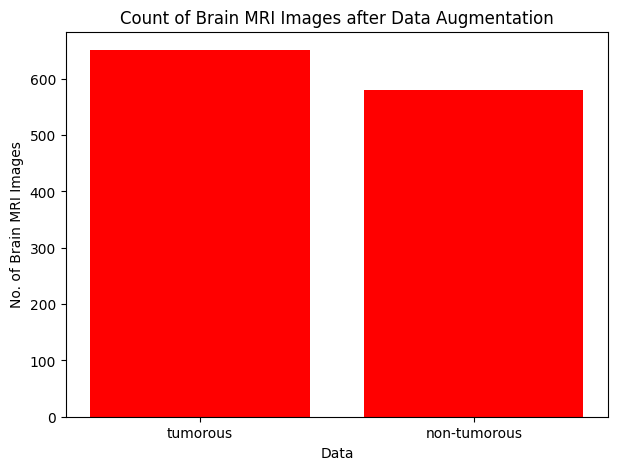

In [8]:
number_files_yes = count_instances(os.path.join(augmented_data_path, 'yes'))
number_files_no = count_instances(os.path.join(augmented_data_path, 'no'))
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}
typex = [*data.keys()]
values = [*data.values()]

fig = plt.figure(figsize = (7, 5))

plt.bar(typex, values, color = 'red')

plt.xlabel("Data")
plt.ylabel("No. of Brain MRI Images")
plt.title("Count of Brain MRI Images after Data Augmentation")
plt.savefig("../data/external/number_augmented_images.jpeg", format='jpeg', dpi=150, bbox_inches='tight')
plt.show()